# Natural Language Processing Workshop Ex 2


SemEval 2017 Task 5 Fine-Grained Sentiment Analysis on Financial Microblogs and News
http://alt.qcri.org/semeval2017/task5/

Task Reference Paper
http://www.aclweb.org/anthology/S17-2089

More reference Paper
http://www.aclweb.org/anthology/S/S17/ 


## Data Exploration

https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

- Variable Identification
- Univariate Analysis
- Bi-variate Analysis
- Missing Value Treatment
- Outlier Detection and Treatment
- Feature Engineering


In [2]:
# Import the necessary modules
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

In [3]:
# LOAD JSON DATA 
df = pd.read_json("data/training_set.json")

In [5]:
print(df.iloc[0])
print(df.iloc[0].tweet)

sentiment                                               -0.463
snippet                                              downgrade
target                                                   $PCAR
tweet        downgrades $SON $ARI $GG $FLTX $WMC $MFA $IVR ...
Name: 0, dtype: object
downgrades $SON $ARI $GG $FLTX $WMC $MFA $IVR $CMI $PCAR $QLIK $AFOP $UNFI #stocks #investing #tradeideas


In [6]:
df.columns

Index(['sentiment', 'snippet', 'target', 'tweet'], dtype='object')

In [15]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 5 columns):
sentiment    1396 non-null float64
snippet      1396 non-null object
target       1396 non-null object
tweet        1396 non-null object
classes      1396 non-null object
dtypes: float64(1), object(4)
memory usage: 54.6+ KB


In [14]:
print(df['target'].value_counts(dropna=False).head(10))

$AAPL    112
$SPY      57
$FB       49
$TSLA     46
$AMZN     22
$BBRY     22
$GOOG     19
$NFLX     18
$YHOO     16
$AMRN     13
Name: target, dtype: int64


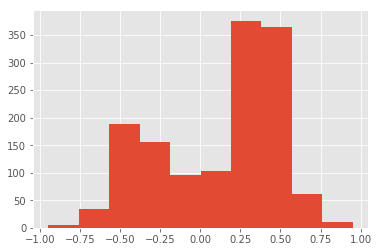

In [7]:
df.sentiment.hist()

In [9]:
import numpy as np

conditions = [
    (df['sentiment'] == 0) , 
    (df['sentiment'] <  0) ,
    (df['sentiment'] >  0)]
choices = ['neutral', 'bullish', 'bearish']
df['classes'] = np.select(conditions, choices)
print(df)

      sentiment                                            snippet  target  \
0        -0.463                                          downgrade   $PCAR   
1         0.678       [looking sexy this morning, break on volume]   $AMZN   
2         0.377                               still long term fan!   $SBUX   
3         0.129  $TFM will have a way to go price wise to compe...     $KR   
4         0.395      iPhone SE Could Be Doing Better Than Expected   $AAPL   
5         0.458      Now up to 200 stocks making new 52 week highs    $TJX   
6         0.288  There's no reason why $GOOGL can't get back to...  $GOOGL   
7        -0.453                                              short   $CVEO   
8         0.372               Pivotal sees 27% upside for Alphabet   $YHOO   
9         0.216                                  the most trending   $DWTI   
10        0.241  $GOOGL patents turn signal detector for autono...  $GOOGL   
11        0.557            Investor long-term stock recommendati

In [10]:
print(df['classes'].value_counts(dropna=False))

bearish    917
bullish    455
neutral     24
Name: classes, dtype: int64


### Visualisation Before Preprocessing

In [17]:
from wordcloud import WordCloud,STOPWORDS

train_pos = df[ df['classes'] == 'bullish']
train_pos = df['tweet']
train_neg = df[ df['classes'] == 'bearish']
train_neg = df['tweet']

Bullish words


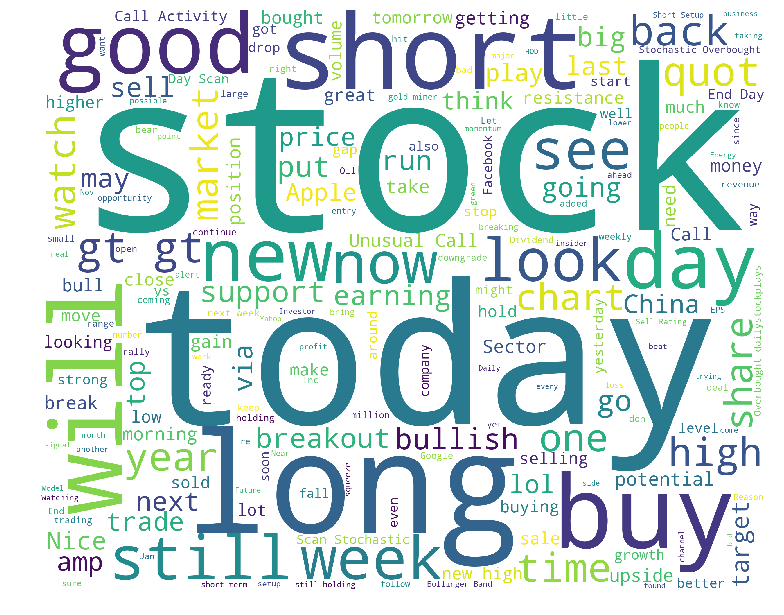

Bearish words


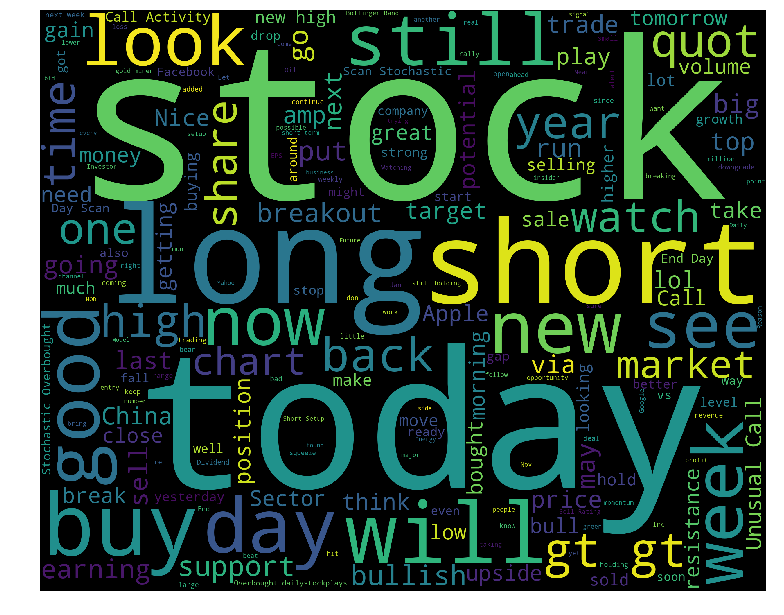

In [19]:
def wordcloud_draw(data, color):
    #Join to Single String
    words = ' '.join(data)
    #Clean Words (Remove mentions, HashTag, CashTag and RT)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                 and not word.startswith('$')
                                and word != 'RT'
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Bullish words")
wordcloud_draw(train_pos,'white')
print("Bearish words")
wordcloud_draw(train_neg,'black')

### 1) What are the most common words?

### 2) What are the most common CashTag?

### 3) Any Corelation with Number of Words with Sentiment?

### 4) What is the top k Bi-gram and tri-gram?
https://stackoverflow.com/questions/14617601/implementing-ngrams-in-python


# Tweets Tokenizer

https://www.nltk.org/api/nltk.tokenize.html


In [29]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

# What is Tweet Tokenizer? 
ttokenizer = TweetTokenizer()

sample = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

print(ttokenizer.tokenize(sample))

# Is There a Need to Handle Long Words? 
ttokenizer2 = TweetTokenizer(strip_handles=True, reduce_len=True)
print(ttokenizer2.tokenize(sample))

# What is the difference with a normal Tokenizer and TweetTokenizer
sample2 = "@mention@mention RT #this#awesome#great#MakeAmericaGreatAgain $CASHTAG"

print(word_tokenize(sample2))
print(ttokenizer.tokenize(sample2))

['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--']
['This', 'is', 'a', 'coool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--']
['@', 'mention', '@', 'mention', 'RT', '#', 'this', '#', 'awesome', '#', 'great', '#', 'MakeAmericaGreatAgain', '$', 'CASHTAG']
['@mention', '@mention', 'RT', '#this', '#awesome', '#great', '#MakeAmericaGreatAgain', '$', 'CASHTAG']
